# Seaborn Intro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# filtering the dataset only for the data analyst role and country == India
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop nan values from the year salary
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

**import seaborn library**

In [2]:
import seaborn as sns

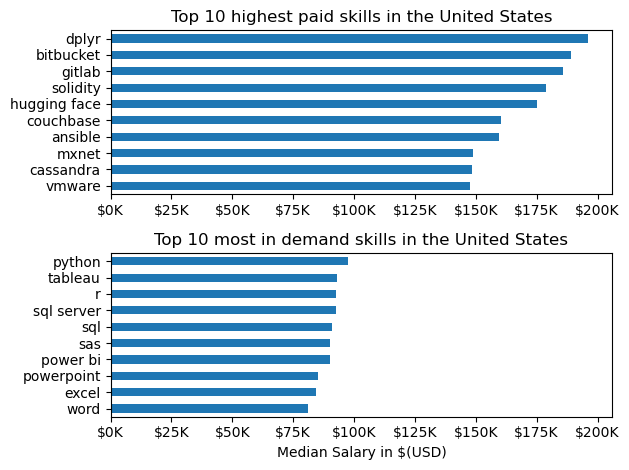

In [3]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US['job_skills']

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_top_pay = df_DA_US_group.sort_values(by = 'median', ascending=False).head(10)
df_top_count = df_DA_US_group.sort_values(by = 'count', ascending=False).head(10).sort_values(by = 'median', ascending=False)

fig, ax = plt.subplots(2,1)

# to plot the graph in reverse start from last element
df_top_pay[::-1].plot(kind='barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 highest paid skills in the United States')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_top_count[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_title('Top 10 most in demand skills in the United States')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary in $(USD)')


fig.tight_layout()

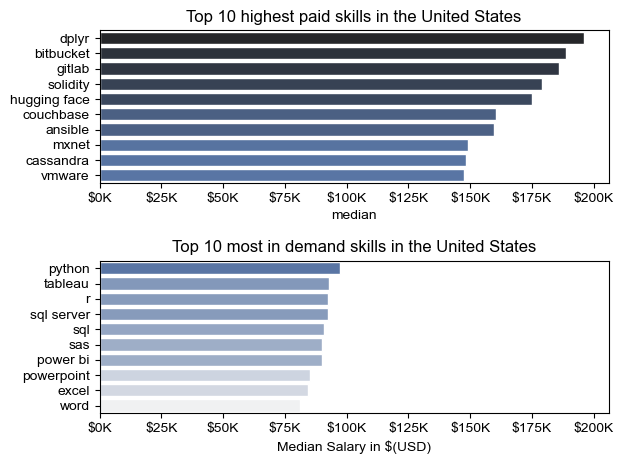

In [10]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

# df_top_pay[::-1].plot(kind='barh', y = 'median', ax = ax[0], legend = False)
sns.barplot(data=df_top_pay, x='median', y= df_top_pay.index, ax = ax[0], hue = 'median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 highest paid skills in the United States')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# df_top_count[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend = False)
sns.barplot(data=df_top_count, x='median', y= df_top_count.index, ax = ax[1], hue = 'median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 most in demand skills in the United States')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary in $(USD)')


fig.tight_layout()

Text(0, 0.5, 'Number of Jobs')

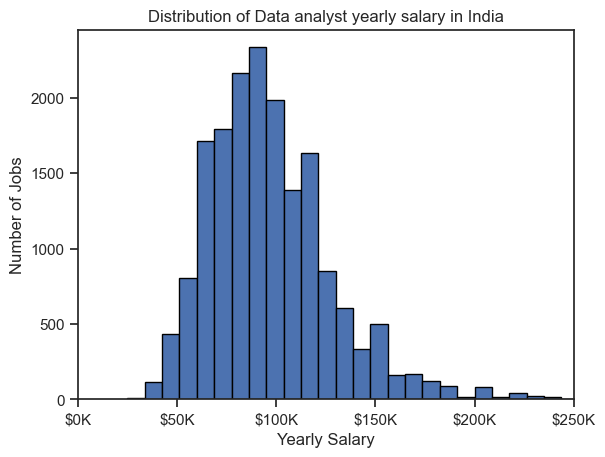

In [11]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data analyst yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

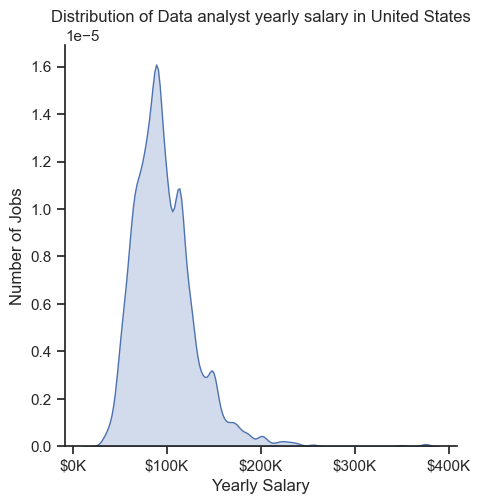

In [17]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill = True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of Data analyst yearly salary in United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

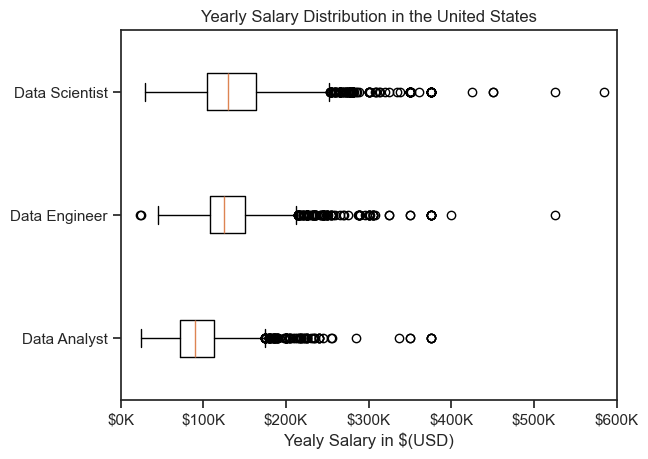

In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) &  (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles ]

plt.boxplot(job_list, tick_labels = job_titles, vert = False)
plt.title('Yearly Salary Distribution in the United States')
plt.xlabel('Yealy Salary in $(USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

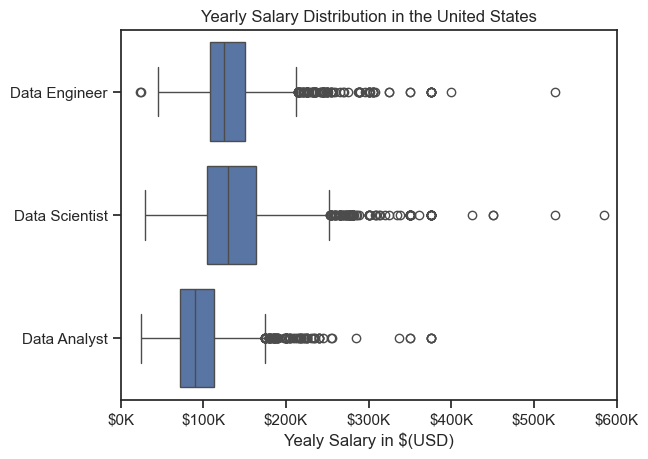

In [20]:
sns.boxplot(data = df_US,x = 'salary_year_avg', y = 'job_title_short' )

plt.title('Yearly Salary Distribution in the United States')
plt.xlabel('Yealy Salary in $(USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()